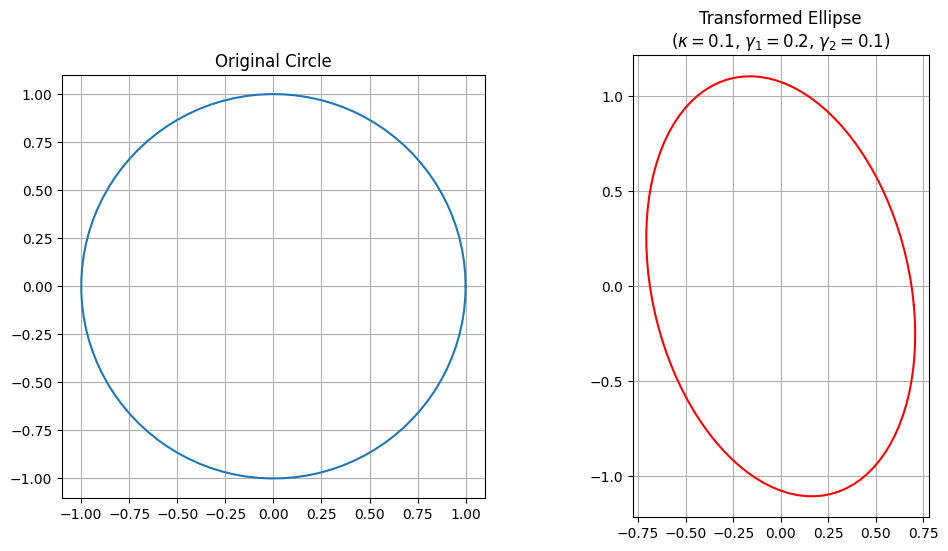

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def transform_circle(kappa, gamma1, gamma2, num_points=100):
    theta = np.linspace(0, 2*np.pi, num_points)
    circle = np.array([np.cos(theta), np.sin(theta)])
    
    A = np.array([[1 - kappa - gamma1, -gamma2],
                  [-gamma2, 1 - kappa + gamma1]])
    
    ellipse = A @ circle
    
    return circle, ellipse

def plot_transformations(kappa, gamma1, gamma2):
    circle, ellipse = transform_circle(kappa, gamma1, gamma2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.plot(circle[0], circle[1], label='Circle')
    ax1.set_title('Original Circle')
    ax1.set_aspect('equal')
    ax1.grid(True)
    
    ax2.plot(ellipse[0], ellipse[1], label='Transformed Ellipse', color='r')
    ax2.set_title(f'Transformed Ellipse\n($\kappa={kappa}$, $\gamma_1={gamma1}$, $\gamma_2={gamma2}$)')
    ax2.set_aspect('equal')
    ax2.grid(True)
    
    plt.show()

# Ejemplo de uso
kappa = 0.1
gamma1 = 0.2
gamma2 = 0.1

plot_transformations(kappa, gamma1, gamma2)


In [3]:
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])
circle.shape

(2, 100)

In [5]:
# Ejemplo de uso
kappa = 0.1
gamma1 = 0.2
gamma2 = 0.1

A = np.array([[1 - kappa - gamma1, -gamma2],
                [-gamma2, 1 - kappa + gamma1]])
A.shape

(2, 2)

In [7]:
ellipse = A @ circle
ellipse.shape

(2, 100)

Como se observa si bien la matriz es algo fijo
$$
\mathbb{A} = \begin{pmatrix} 1 - \kappa - \gamma_1 & -\gamma_2 \\ -\gamma_2 & 1 - \kappa + \gamma_1 \end{pmatrix}
$$
Esta al ir por cada punto provoca la transformacion lineal del circulo en una elipse

# Mapas de convergencia variables
En el caso de que la matriz dependa de las coordenadas del plano provocara una imagen "distorcionada", vamos a ver los distintos efectos

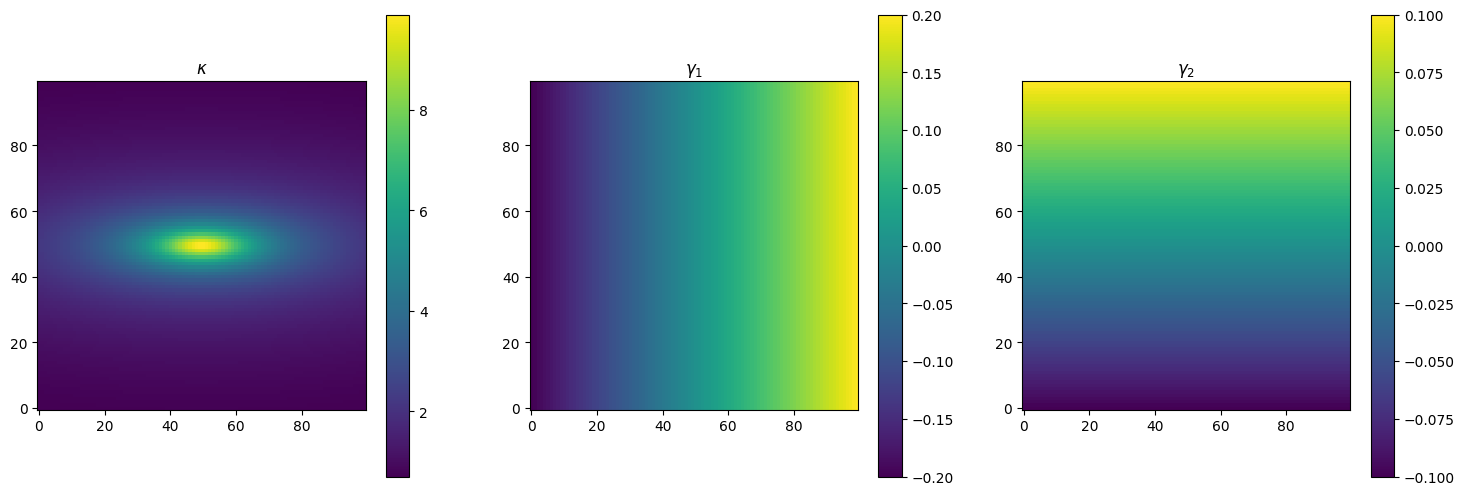

In [12]:
def generate_kappa_gamma_maps(shape):
    x = np.linspace(-1, 1, shape[1])
    y = np.linspace(-1, 1, shape[0])
    X, Y = np.meshgrid(x, y)
    
    eps = 0.8
    thetac = 0.1
        # este es un modelo de una galaxia
    kappa =  1/np.sqrt(thetac**2 + (1 - eps)*X**2 + (1 + eps)*Y**2  )
    #kappa = 0.1 * np.sqrt(1 - X**2 - Y**2)
    gamma1 = 0.2 * X
    gamma2 = 0.1 * Y
    
    return kappa, gamma1, gamma2

# Definir el tamaño de la forma
shape = (100, 100)

# Generar mapas de kappa, gamma1 y gamma2
kappa, gamma1, gamma2 = generate_kappa_gamma_maps(shape)

# Crear los gráficos de color
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

cax1 = ax1.imshow(kappa, cmap='viridis', origin='lower')
ax1.set_title('$\kappa$')
fig.colorbar(cax1, ax=ax1, orientation='vertical')

cax2 = ax2.imshow(gamma1, cmap='viridis', origin='lower')
ax2.set_title('$\gamma_1$')
fig.colorbar(cax2, ax=ax2, orientation='vertical')

cax3 = ax3.imshow(gamma2, cmap='viridis', origin='lower')
ax3.set_title('$\gamma_2$')
fig.colorbar(cax3, ax=ax3, orientation='vertical')

plt.show()

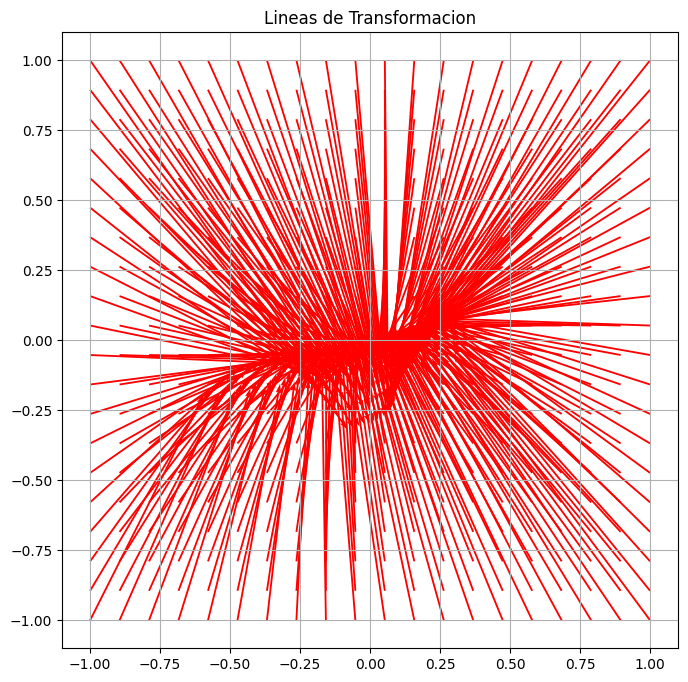

In [13]:

def transform_grid(kappa, gamma1, gamma2, grid_size=(20, 20)):
    x = np.linspace(-1, 1, grid_size[1])
    y = np.linspace(-1, 1, grid_size[0])
    X, Y = np.meshgrid(x, y)
    
    U, V = np.zeros_like(X), np.zeros_like(Y)
    
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            A = np.array([[1 - kappa[i, j] - gamma1[i, j], -gamma2[i, j]],
                          [-gamma2[i, j], 1 - kappa[i, j] + gamma1[i, j]]])
            vec = np.array([X[i, j], Y[i, j]])
            transformed_vec = A @ vec
            U[i, j], V[i, j] = transformed_vec
    
    return X, Y, U, V

def plot_transformed_grid(X, Y, U, V):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.quiver(X, Y, U-X, V-Y, angles='xy', scale_units='xy', scale=1, color='r')
    ax.set_aspect('equal')
    ax.grid(True)


# Generar mapas de kappa y gamma
shape = (100, 100)
kappa, gamma1, gamma2 = generate_kappa_gamma_maps(shape)

# Transformar una cuadrícula
grid_size = (20, 20)
X, Y, U, V = transform_grid(kappa, gamma1, gamma2, grid_size)

# Visualizar la cuadrícula transformada
plot_transformed_grid(X, Y, U, V)
plt.title("Lineas de Transformacion")
plt.show()


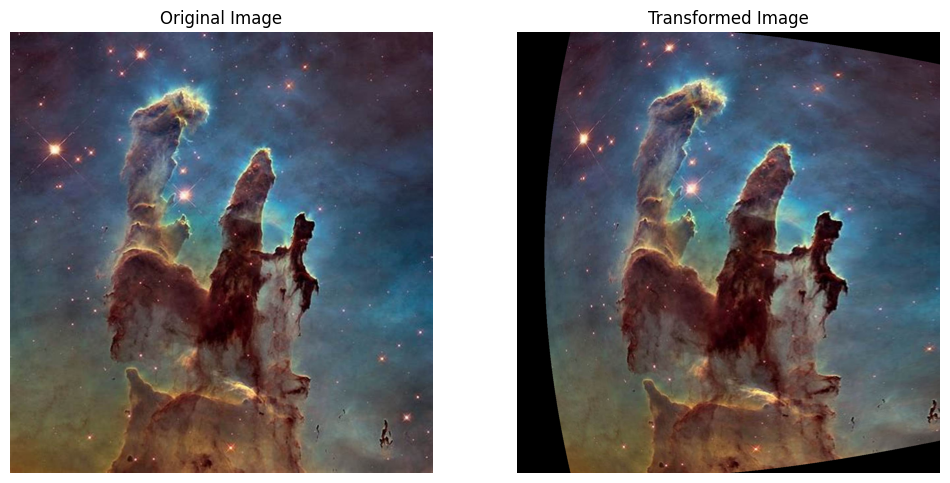

In [9]:
from PIL import Image


def transform_image(image, kappa, gamma1, gamma2):
    width, height = image.size
    X, Y = np.meshgrid(np.arange(width), np.arange(height))
    U, V = np.zeros_like(X, dtype=float), np.zeros_like(Y, dtype=float)
    
    X_normalized = 2 * (X / width) - 1
    Y_normalized = 2 * (Y / height) - 1

    for i in range(height):
        for j in range(width):
            A = np.array([[1 - kappa[i, j] - gamma1[i, j], -gamma2[i, j]],
                          [-gamma2[i, j], 1 - kappa[i, j] + gamma1[i, j]]])
            vec = np.array([X_normalized[i, j], Y_normalized[i, j]])
            transformed_vec = A @ vec
            U[i, j] = (transformed_vec[0] + 1) * 0.5 * width
            V[i, j] = (transformed_vec[1] + 1) * 0.5 * height

    transformed_image = Image.new("RGB", (width, height))
    pixels = transformed_image.load()

    original_pixels = image.load()
    for i in range(height):
        for j in range(width):
            x_new, y_new = int(U[i, j]), int(V[i, j])
            if 0 <= x_new < width and 0 <= y_new < height:
                pixels[j, i] = original_pixels[x_new, y_new]

    return transformed_image

def plot_images(original_image, transformed_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(original_image)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(transformed_image)
    ax2.set_title('Transformed Image')
    ax2.axis('off')

    plt.show()

# Cargar imagen
image_path = 'hubble.png'
image = Image.open(image_path)

# Generar mapas de kappa y gamma
shape = (image.height, image.width)
kappa, gamma1, gamma2 = generate_kappa_gamma_maps(shape)

# Transformar la imagen
transformed_image = transform_image(image, kappa, gamma1, gamma2)

# Visualizar la imagen original y transformada
plot_images(image, transformed_image)
